In [ ]:
d#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import time
import os

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 하선 외선 퇴근 노선:2,5,6,7

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/교내공모전/교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv")
data1

,호선명,지하철역,위도,경도,상세주소,총층수,퇴근_하외선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",열차내 사고,역구내 사고,출입문관련,승강설비관련,발빠짐,기타,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"퇴근시간 혼잡도 평균(하선,외선)",퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW
0,2,강남,37.497175,127.027926,서울서초구서초동1374,3,4.591304,231421,306995,194665,133157,175540,102460,831736.5000,3,2,0,4,0,2,0,8,5,0,1,6,1,4,51.028571,63623,64662,13830,28290,4255,6819,77414,176616,25441,54152,44573,14110,31901,3743,9226,53525,53178,14839
1,2,강변,37.535095,127.094681,서울광진구구의동546-6,2,4.684685,55399,60433,42352,75872,104712,74744,315529.9167,3,0,0,3,1,0,0,4,9,0,0,7,0,5,46.614286,28194,51770,6347,23286,6113,6125,17597,59279,5337,31968,43201,6049,29350,5317,7344,19731,74491,5656
2,2,건대입구,37.540693,127.070230,서울광진구화양동6-4,5,4.732143,71707,82653,62600,104416,148210,99593,374320.8333,3,0,0,4,2,0,0,6,11,1,2,2,2,6,36.814286,59948,60871,9841,34947,4969,13926,19069,57530,8332,83523,47796,8416,58633,5727,14133,56398,82202,11638
3,2,교대,37.493415,127.014080,서울서초구서초동1672-9,3,4.600000,94092,133499,62492,59247,71156,40900,367315.6667,2,0,1,13,1,0,0,15,6,0,2,4,2,2,47.457143,42097,48426,9262,27828,4485,7197,41261,109678,11762,38798,46772,9906,24652,4079,6245,33489,53051,12053
4,2,구로디지털단지,37.485266,126.901401,서울구로구구로동810-3,3,4.566964,125847,211812,99898,101032,155570,124825,731249.1667,3,1,0,3,5,4,0,13,10,1,0,8,0,6,48.528571,38836,63695,11051,16667,6515,5802,71899,243316,13081,38540,34550,12178,36146,4952,11557,41971,65567,10264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,8,송파,37.499703,127.112183,서울송파구가락동459-4,2,7.521739,14008,15648,8586,18854,27084,21194,145565.6667,2,1,0,0,0,0,0,1,10,1,0,3,0,4,75.200000,19268,29954,5431,27415,3273,8245,11140,39031,6073,20273,48129,5143,14502,2874,5783,15194,57882,6242
238,8,암사,37.550210,127.127562,서울강동구암사동501,2,7.411111,21767,22565,12895,41399,66779,56360,303951.5833,2,0,0,2,0,0,0,2,8,1,0,7,0,2,8.285714,10363,23206,2565,11361,3271,3146,4499,17814,1846,11653,23024,2386,13108,2323,3137,7355,35498,2501
239,8,잠실,37.513950,127.102234,서울송파구신천동8,3,7.488889,44590,62654,36630,34895,41081,20704,226009.8333,2,0,1,4,2,1,0,8,6,1,0,6,0,8,71.128571,120574,128050,15411,18363,4393,4911,57057,153319,19847,103540,32495,8111,70325,2858,8240,66926,42590,7351
240,8,장지,37.478703,127.126191,서울송파구장지동217-3,2,7.544444,41998,45848,25291,31529,49029,34351,295459.2500,2,0,0,0,0,0,0,0,6,2,0,9,0,12,62.057143,46442,93639,12719,18093,4935,4972,65305,191823,14468,40525,29629,14069,43097,4150,18770,32622,60490,13189


In [ ]:
data1 = data1[data1['호선명'].isin([2, 5, 6, 7])]
len(data1)

174

In [ ]:
columns_to_remove = ['열차내 사고', '역구내 사고', '출입문관련', '승강설비관련', '발빠짐', '기타']
data1 = data1.drop(columns=columns_to_remove)
data1[data1.isnull().any(axis=1)]

,호선명,지하철역,위도,경도,상세주소,총층수,퇴근_하외선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"퇴근시간 혼잡도 평균(하선,외선)",퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW


# OLS 학습 후 다중공선성 확인

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = data1.copy()

In [ ]:
columns_to_remove = ['호선명', '지하철역', '위도', '경도', '상세주소']
df1 = df1.drop(columns=columns_to_remove)

In [ ]:
import re

def modify_column_names(df):
    new_columns = []
    for column in df.columns:
        modified_name = re.sub(r'\([^)]*\)', '', column)
        modified_name = modified_name.replace('-', '_')
        modified_name = modified_name.replace(' ', '_')
        new_columns.append(modified_name)

    return new_columns

df1.columns = modify_column_names(df1)
df1

,총층수,퇴근_하외선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,퇴근시간_혼잡도_평균,퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW
0,3,4.591304,231421,306995,194665,133157,175540,102460,831736.50000,3,8,5,0,1,6,1,4,51.028571,63623,64662,13830,28290,4255,6819,77414,176616,25441,54152,44573,14110,31901,3743,9226,53525,53178,14839
1,2,4.684685,55399,60433,42352,75872,104712,74744,315529.91670,3,4,9,0,0,7,0,5,46.614286,28194,51770,6347,23286,6113,6125,17597,59279,5337,31968,43201,6049,29350,5317,7344,19731,74491,5656
2,5,4.732143,71707,82653,62600,104416,148210,99593,374320.83330,3,6,11,1,2,2,2,6,36.814286,59948,60871,9841,34947,4969,13926,19069,57530,8332,83523,47796,8416,58633,5727,14133,56398,82202,11638
3,3,4.600000,94092,133499,62492,59247,71156,40900,367315.66670,2,15,6,0,2,4,2,2,47.457143,42097,48426,9262,27828,4485,7197,41261,109678,11762,38798,46772,9906,24652,4079,6245,33489,53051,12053
4,3,4.566964,125847,211812,99898,101032,155570,124825,731249.16670,3,13,10,1,0,8,0,6,48.528571,38836,63695,11051,16667,6515,5802,71899,243316,13081,38540,34550,12178,36146,4952,11557,41971,65567,10264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2,5.179104,13554,13591,7128,26117,44417,36192,147597.83330,3,0,8,2,1,5,1,5,69.028571,12648,23816,3366,22017,2030,7425,8015,28886,2705,13368,51565,5421,10374,2298,3612,9568,103555,4617
227,4,5.014493,61987,107824,51517,19783,20520,13292,244815.25000,2,2,8,2,0,10,0,6,41.142857,114472,119337,23735,14521,1989,3625,95531,229096,17762,82460,23273,13114,55101,1845,11507,73371,25196,16851
228,4,5.014493,18596,18903,11053,17195,23813,20865,95405.08333,3,1,8,1,2,11,2,7,25.842857,29099,56466,6991,32461,4720,11188,12478,48988,4936,34717,62628,7062,34661,4615,8783,24630,93542,6990
229,3,5.028571,28767,24149,13536,34821,53025,51620,246439.00000,3,0,20,1,2,10,2,7,22.457143,5715,9119,903,17267,2070,5660,2403,7411,990,6443,30114,1678,4883,2929,1200,2080,36888,1311


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


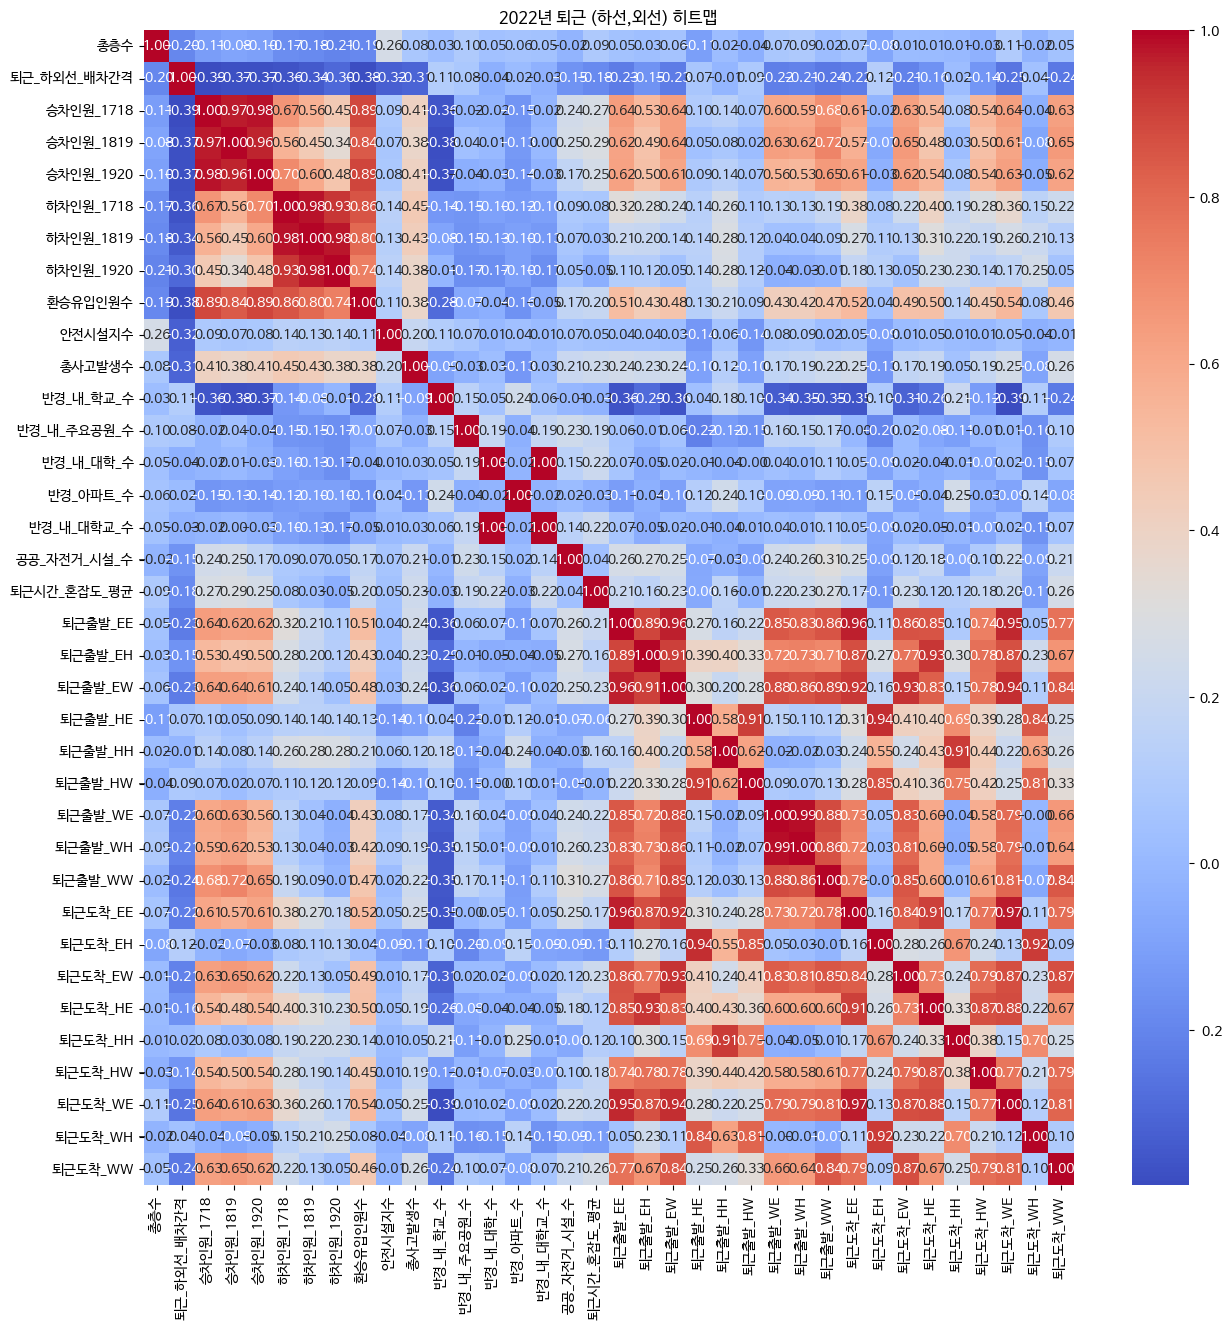

In [ ]:
correlation_matrix = df1.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2022년 퇴근 (하선,외선) 히트맵")
plt.show()

# 이번 버전은 단톡방에서 언급된 것처럼 출퇴근과 무관한 변수들은 제거 (EE와 같은..)

In [ ]:
columns_to_remove = ['퇴근출발_EE', '퇴근출발_EH', '퇴근출발_HE', '퇴근출발_HH', '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_HE', '퇴근도착_HH']
df1 = df1.drop(columns=columns_to_remove)

In [ ]:
text_join1 = ' + '.join(df1.columns)
text_join1

'총층수 + 퇴근_하외선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 퇴근시간_혼잡도_평균 + 퇴근출발_EW + 퇴근출발_HW + 퇴근출발_WE + 퇴근출발_WH + 퇴근출발_WW + 퇴근도착_EW + 퇴근도착_HW + 퇴근도착_WE + 퇴근도착_WH + 퇴근도착_WW'

In [ ]:
print(df1.columns)

Index(['총층수', '퇴근_하외선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근시간_혼잡도_평균', '퇴근출발_EW', '퇴근출발_HW', '퇴근출발_WE',
       '퇴근출발_WH', '퇴근출발_WW', '퇴근도착_EW', '퇴근도착_HW', '퇴근도착_WE', '퇴근도착_WH',
       '퇴근도착_WW'],
      dtype='object')


In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df1.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['총층수', '퇴근_하외선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근출발_EW', '퇴근출발_HW', '퇴근출발_WE',
       '퇴근출발_WH', '퇴근출발_WW', '퇴근도착_EW', '퇴근도착_HW', '퇴근도착_WE', '퇴근도착_WH',
       '퇴근도착_WW']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬

## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다.
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('퇴근시간_혼잡도_평균 ~총층수 + 퇴근_하외선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 퇴근출발_EW + 퇴근출발_HW + 퇴근출발_WE + 퇴근출발_WH + 퇴근출발_WW + 퇴근도착_EW + 퇴근도착_HW + 퇴근도착_WE + 퇴근도착_WH + 퇴근도착_WW',data=sdf).fit()

variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.395
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           0.000492
Time:                        08:50:32   Log-Likelihood:                 233.85
No. Observations:                 174   AIC:                            -411.7
Df Residuals:                     146   BIC:                            -323.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.825e-18      0.005   9.24e-16      1.000      -0.010       0.010
총층수             0.0244      0.086      0.284      0.777      -0.146       0.195
퇴근_하외선_배차간격    -0.1072      0.089     -1.211      0.228      -0.282       0.068
승차인원_1718       0.5486      0.529      1.036      0.302      -0.498       1.595
승차인원_1819      -0.2931      0.516     -0.568      0.571      -1.314       0.727
승차인원_1920      -0.4524      0.598     -0.756      0.451      -1.635       0.730
하차인원_1718      -0.8130      0.684     -1.188      0.237      -2.166       0.540
하차인원_1819       2.2864      0.889      2.572      0.011       0.530       4.043
하차인원_1920      -1.8893      0.513     -3.683      0.000      -2.903      -0.876
환승유입인원수         0.5963      0.349      1.710      0.089      -0.093       1.285
안전시설지수         -0.0066      0.082     -0.081      0.936      -0.168       0.155
총사고발생수          0.1619      0.097      1.666      0.098      -0.030       0.354
반경_내_학교_수       0.1505      0.094      1.608      0.110      -0.034       0.335
반경_내_주요공원_수     0.1626      0.083      1.958      0.052      -0.002       0.327
반경_내_대학_수      -0.0475      1.305     -0.036      0.971      -2.628       2.533
반경_아파트_수        0.0053      0.076      0.070      0.944      -0.145       0.156
반경_내_대학교_수      0.1619      1.309      0.124      0.902      -2.425       2.749
공공_자전거_시설_수    -0.1682      0.087     -1.934      0.055      -0.340       0.004
퇴근출발_EW         0.3045      0.396      0.768      0.444      -0.479       1.088
퇴근출발_HW         0.0272      0.178      0.153      0.879      -0.324       0.379
퇴근출발_WE        -0.9757      0.566     -1.723      0.087      -2.095       0.143
퇴근출발_WH         0.7894      0.532      1.484      0.140      -0.262       1.841
퇴근출발_WW        -0.0241      0.319     -0.076      0.940      -0.654       0.606
퇴근도착_EW         0.1902      0.336      0.566      0.572      -0.474       0.854
퇴근도착_HW        -0.0482      0.171     -0.281      0.779      -0.386       0.290
퇴근도착_WE        -0.2670      0.298     -0.895      0.372      -0.857       0.323
퇴근도착_WH        -0.1155      0.160     -0.720      0.472      -0.432       0.201
퇴근도착_WW         0.0706      0.297      0.237      0.813      -0.517       0.658
==============================================================================
Omnibus:                        5.166   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.831
Skew:                           0.399   Prob(JB):                       0.0893
Kurtosis:                       3.167   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_res

,Variable,Estimate,VIF
0,총층수,0.024420,1.562713
1,퇴근_하외선_배차간격,-0.107223,1.650860
2,승차인원_1718,0.548615,59.030364
3,승차인원_1819,-0.293094,56.177966
4,승차인원_1920,-0.452393,75.402690
5,하차인원_1718,-0.812988,98.670537
6,하차인원_1819,2.286378,166.421618
7,하차인원_1920,-1.889337,55.427759
8,환승유입인원수,0.596258,25.613080
9,안전시설지수,-0.006594,1.409497


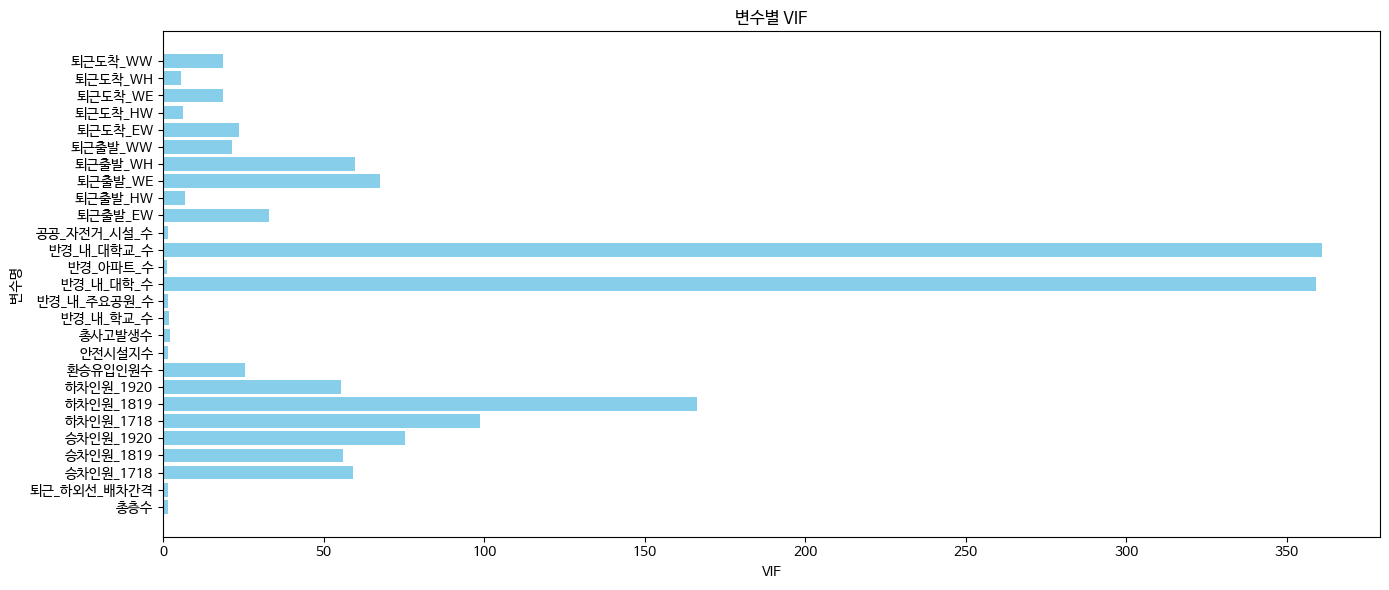

In [ ]:
# 변수명과 VIF 값 추출
variables = df_res['Variable']
vif_values = df_res['VIF']

# 막대 그래프로 변수별 VIF 시각화
plt.figure(figsize=(14, 6))
plt.barh(variables, vif_values, color='skyblue')
plt.xlabel('VIF')
plt.ylabel('변수명')
plt.title('변수별 VIF')
plt.tight_layout()
plt.show()

=> 다중공선성 문제 해결을 위해 변수선택 필요

# 다중공선성이 있기에 변수선택을 진행 [후진 제거법]

In [ ]:
import statsmodels.api as sm

## 후진 소거법
variables = ['총층수', '퇴근_하외선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근출발_EW', '퇴근출발_HW', '퇴근출발_WE',
       '퇴근출발_WH', '퇴근출발_WW', '퇴근도착_EW', '퇴근도착_HW', '퇴근도착_WE', '퇴근도착_WH',
       '퇴근도착_WW']  # 설명 변수 리스트

y = df1['퇴근시간_혼잡도_평균']

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df1[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break


In [ ]:
selected_variables

['하차인원_1718',
 '하차인원_1819',
 '하차인원_1920',
 '환승유입인원수',
 '총사고발생수',
 '반경_내_학교_수',
 '반경_내_주요공원_수',
 '반경_내_대학교_수',
 '공공_자전거_시설_수']

In [ ]:
selected_columns = ['하차인원_1718','퇴근시간_혼잡도_평균',
 '하차인원_1819',
 '하차인원_1920',
 '환승유입인원수',
 '총사고발생수',
 '반경_내_학교_수',
 '반경_내_주요공원_수',
 '반경_내_대학교_수',
 '공공_자전거_시설_수']
df2 = df1[selected_columns]
df2

,하차인원_1718,퇴근시간_혼잡도_평균,하차인원_1819,하차인원_1920,환승유입인원수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학교_수,공공_자전거_시설_수
0,133157,51.028571,175540,102460,831736.50000,8,5,0,1,4
1,75872,46.614286,104712,74744,315529.91670,4,9,0,0,5
2,104416,36.814286,148210,99593,374320.83330,6,11,1,2,6
3,59247,47.457143,71156,40900,367315.66670,15,6,0,2,2
4,101032,48.528571,155570,124825,731249.16670,13,10,1,0,6
...,...,...,...,...,...,...,...,...,...,...
226,26117,69.028571,44417,36192,147597.83330,0,8,2,1,5
227,19783,41.142857,20520,13292,244815.25000,2,8,2,0,6
228,17195,25.842857,23813,20865,95405.08333,1,8,1,2,7
229,34821,22.457143,53025,51620,246439.00000,0,20,1,2,7


# 최적모형 선택

수정결정계수, Mallows' Cp, AIC, BIC, PRESS 기준으로 판단

수정결정계수 -> 높을수록 좋은 모형

Mallows' Cp -> 값이 작을수록 & Cp값이 변수의 개수 p와 가까울수록 좋은 모형

AIC -> 작을수록 좋은 모형

BIC -> 작을수록 좋은 모형

PRESS -> 작을수록 좋은 예측력을 가진 모형

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from itertools import combinations
from statsmodels.formula.api import ols

In [ ]:
df2.insert(0,'Intercept',[1]*len(df2)) ## 상수항 추가

In [ ]:
print(df2.columns)

Index(['Intercept', '하차인원_1718', '퇴근시간_혼잡도_평균', '하차인원_1819', '하차인원_1920',
       '환승유입인원수', '총사고발생수', '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학교_수',
       '공공_자전거_시설_수'],
      dtype='object')


In [ ]:
text_join2 = ' + '.join(df2.columns)
text_join2

'Intercept + 하차인원_1718 + 퇴근시간_혼잡도_평균 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수'

In [ ]:
#모델 적합
fit = ols('퇴근시간_혼잡도_평균~하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수',data=df2).fit()

## hat matrix 계산
X = np.array(df2[['Intercept', '하차인원_1718', '하차인원_1819', '하차인원_1920',
       '환승유입인원수', '총사고발생수', '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학교_수',
       '공공_자전거_시설_수']]) ## Model matrix for full model

X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)
hat_matrix = np.matmul(np.matmul(X,X_tX_inv),X.transpose()) ## hat matrix
diagonals = np.array([hat_matrix[i][i] for i in range(len(df2))]) ## hat matrix의 대각원소

response = '퇴근시간_혼잡도_평균'
y = df2[response] ## 반응 변수 벡터
variables = ['하차인원_1718', '하차인원_1819', '하차인원_1920',
       '환승유입인원수', '총사고발생수', '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학교_수',
       '공공_자전거_시설_수'] ## 총 변수집합

num_var = len(variables) ## 총 변수 개수
num_data = len(df2) ## 데이터 개수
mse_full = fit.mse_resid ## 모든 변수를 포함한 mean square residual
mean_response = np.mean(y) ## y의 평균

cp_list = [] ## Mallow's C
ad_r_list = [] ## 수정된 결정계수
aic_list = [] ## Akaike's information criterion
bic_list = [] ## Bayes information criterion
press_list = [] ## press criterion

num_parameter = [] ## 파라미터 즉 절편을 포함한 회귀계수의 개수
subsets = [] ## 변수의 집합
for p in range(num_var+1):
    if p == 0: ## 절편만 있는 모형
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None') ## 절편만 있고 변수는 없음
        sub_fit = ols(exp,data=df2).fit() ## 절편만 있는 모형 적합
        sse = np.sum(np.square(sub_fit.resid)) ## square sum of residual
        sst = np.sum(np.square(y-mean_response)) ## total sum of square
        cp = sse/mse_full - (num_data-2*(p+1)) ## Mallow's C
        ad_r = 0 ## 수정된 결정계수 절편만 있다면 수정된 결정계수 값은 0
        aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1) ## Akaike's information criterion
        bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1) ## Bayes information criterion
        press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals))) ## press
        cp_list.append(cp)
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        press_list.append(press)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = ols(exp,data=df2).fit()
            sse = np.sum(np.square(sub_fit.resid))
            sst = np.sum(np.square(y-np.mean(y)))
            cp = sse/mse_full - (num_data-2*(p+1))
            ad_r = 1 - ((num_data-1)/(num_data-p-1))*(sse/sst)
            aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1)
            bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1)
            press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals)))
            cp_list.append(cp)
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            press_list.append(press)
            num_parameter.append(p+1)

df2_res = pd.DataFrame()
df2_res['Variables'] = subsets
df2_res['Number_of_parameter'] = num_parameter
df2_res['Ad_R'] = ad_r_list
df2_res['Cp'] = cp_list
df2_res['AIC'] = aic_list
df2_res['BIC'] = bic_list
df2_res['PRESS'] = press_list

In [ ]:
df2_res

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
0,None,1,0.000000,50.963078,1057.994135,1061.153191,85307.741373
1,하차인원_1718,2,0.000078,51.657065,1058.971928,1065.290039,84849.440064
2,하차인원_1819,2,-0.004791,52.736241,1059.817022,1066.135133,85248.666960
3,하차인원_1920,2,-0.003733,52.501869,1059.633836,1065.951946,85168.263655
4,환승유입인원수,2,0.033141,44.327847,1053.121249,1059.439359,81399.324648
...,...,...,...,...,...,...,...
507,"하차인원_1718, 하차인원_1819, 하차인원_1920, 총사고발생수, 반경_내_...",9,0.173453,19.767348,1032.609114,1061.040611,69288.070481
508,"하차인원_1718, 하차인원_1819, 환승유입인원수, 총사고발생수, 반경_내_학교...",9,0.163171,21.953952,1034.760377,1063.191875,66642.831870
509,"하차인원_1718, 하차인원_1920, 환승유입인원수, 총사고발생수, 반경_내_학교...",9,0.197014,14.757073,1027.577153,1056.008650,64595.950213
510,"하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발생수, 반경_내_학교...",9,0.214742,10.987102,1023.692543,1052.124040,64088.472544


In [ ]:
# Ad_R, Cp, AIC, BIC, PRESS 지표에 대한 최적모델
best_models = {
    'Ad_R': df2_res[df2_res['Ad_R'] == df2_res['Ad_R'].max()],
    'Cp': df2_res[df2_res['Cp'] == df2_res['Cp'].min()],
    'AIC': df2_res[df2_res['AIC'] == df2_res['AIC'].min()],
    'BIC': df2_res[df2_res['BIC'] == df2_res['BIC'].min()],
    'PRESS': df2_res[df2_res['PRESS'] == df2_res['PRESS'].min()]
}

best_models_df = pd.DataFrame()
for metric, best_model in best_models.items():
    best_models_df = best_models_df.append(best_model)

best_models_df

<ipython-input-29-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-29-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-29-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-29-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-29-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed fro

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
511,"하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발...",10,0.224087,10.000000,1022.551817,1054.142370,62746.008372
511,"하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발...",10,0.224087,10.000000,1022.551817,1054.142370,62746.008372
511,"하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발...",10,0.224087,10.000000,1022.551817,1054.142370,62746.008372
222,"하차인원_1920, 환승유입인원수, 총사고발생수, 반경_내_주요공원_수",5,0.169341,16.924103,1029.640565,1045.435841,67653.175672
511,"하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발...",10,0.224087,10.000000,1022.551817,1054.142370,62746.008372


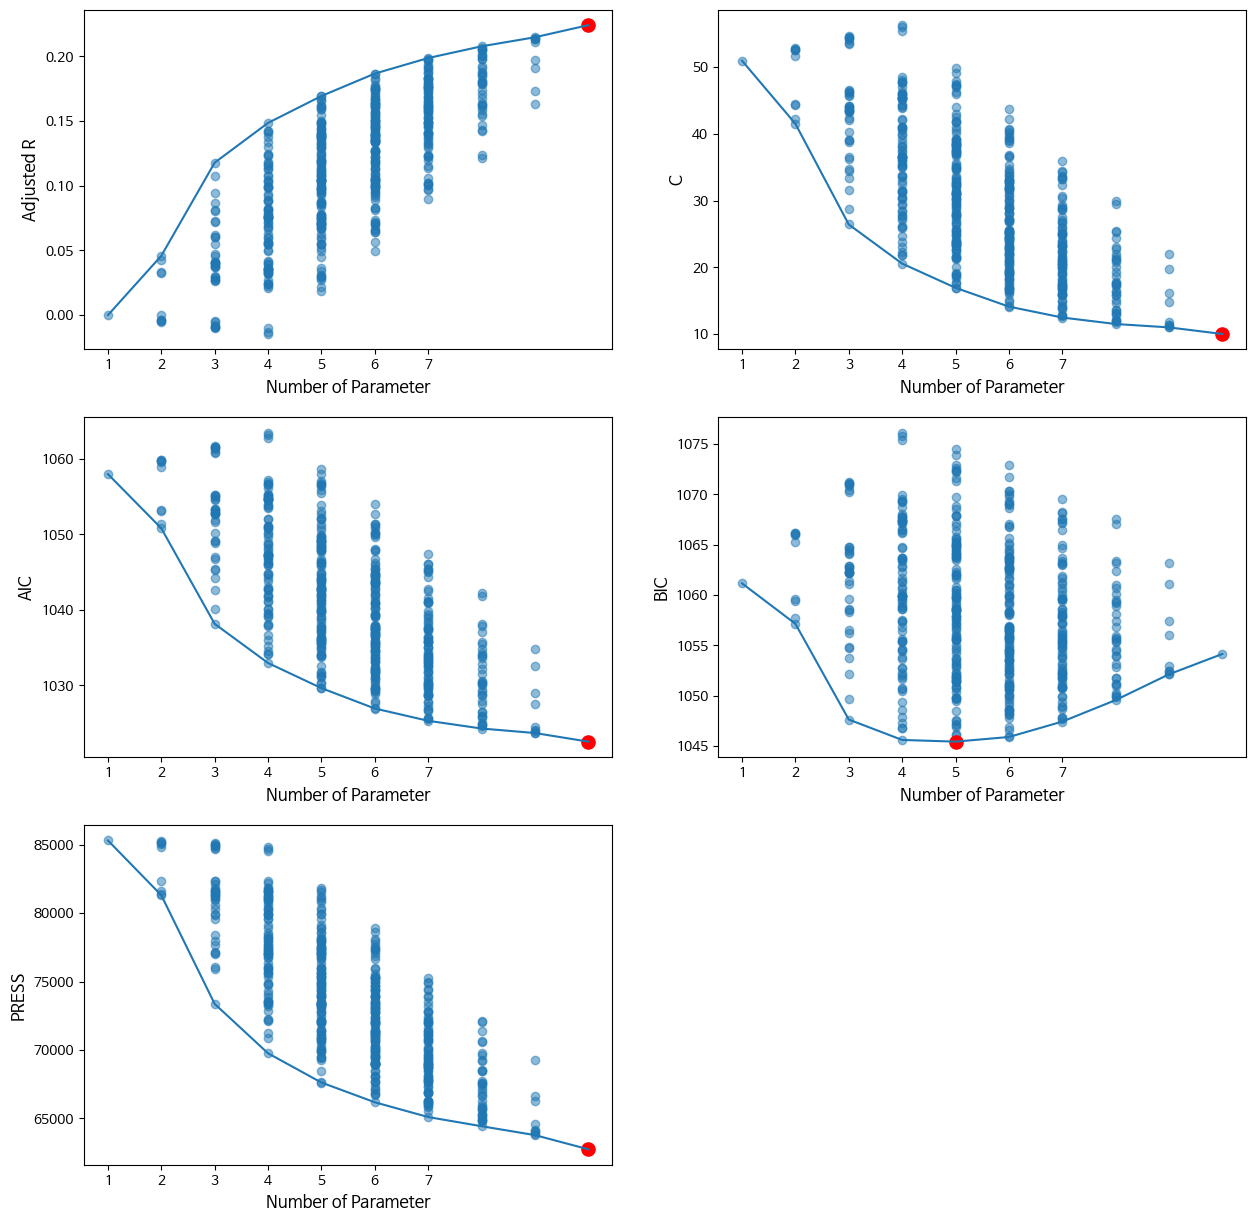

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
font_size = 12
columns = ['Ad_R', 'Cp', 'AIC', 'BIC', 'PRESS']
xlabel = 'Number of Parameter'
ylabels = ['Adjusted R','C','AIC','BIC','PRESS']

marker_style = dict(color='red',marker='o',markersize=10)

for i in range(len(ylabels)):
    ind = 320+i+1
    plt.subplot(ind)
    plt.scatter(df2_res['Number_of_parameter'],df2_res[columns[i]],alpha=0.5)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabels[i],fontsize=font_size)
    if ylabels[i] == 'Adjusted R':
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].max()
        idx = temp_df2[columns[i]].idxmax()
        max_val = temp_df2[columns[i]].max()
        plt.scatter(temp_df2['Number_of_parameter'][idx], max_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    else:
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].min()
        idx = temp_df2[columns[i]].idxmin()
        min_val = temp_df2[columns[i]].min()
        plt.scatter(temp_df2['Number_of_parameter'][idx], min_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    plt.xticks(range(1,8))

plt.show()

수정결정계수, Mallows' Cp, AIC, PRESS 는 파라미터가 10개인 모형을 선호

In [ ]:
best_models_df[best_models_df['Number_of_parameter'] == 10]['Variables'].unique()

array(['하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발생수, 반경_내_학교_수, 반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수'],
      dtype=object)

['하차인원_1718, 하차인원_1819, 하차인원_1920, 환승유입인원수, 총사고발생수, 반경_내_학교_수, 반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수']에 상수항 추가된 버전

# 최종 모델적합

상수항 포함 케이스

In [ ]:
selected_columns = ['하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '총사고발생수', '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학교_수', '공공_자전거_시설_수','퇴근시간_혼잡도_평균']
df3 = df1[selected_columns]
df3

,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학교_수,공공_자전거_시설_수,퇴근시간_혼잡도_평균
0,133157,175540,102460,831736.50000,8,5,0,1,4,51.028571
1,75872,104712,74744,315529.91670,4,9,0,0,5,46.614286
2,104416,148210,99593,374320.83330,6,11,1,2,6,36.814286
3,59247,71156,40900,367315.66670,15,6,0,2,2,47.457143
4,101032,155570,124825,731249.16670,13,10,1,0,6,48.528571
...,...,...,...,...,...,...,...,...,...,...
226,26117,44417,36192,147597.83330,0,8,2,1,5,69.028571
227,19783,20520,13292,244815.25000,2,8,2,0,6,41.142857
228,17195,23813,20865,95405.08333,1,8,1,2,7,25.842857
229,34821,53025,51620,246439.00000,0,20,1,2,7,22.457143


In [ ]:
text_join3 = ' + '.join(df3.columns)
text_join3

'하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 퇴근시간_혼잡도_평균'

In [ ]:
model1 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수', data=df3) #상수항 포함모델
results1 = model1.fit()

# 계수 및 상수항 출력
coefficients1 = results1.params
intercept1 = results1.params['Intercept']  # 상수항

print("계수 (Coefficients):\n", coefficients1)
print("상수항 (Intercept):\n", intercept1)

계수 (Coefficients):
 Intercept      31.699020
하차인원_1718      -0.000671
하차인원_1819       0.001067
하차인원_1920      -0.001145
환승유입인원수         0.000063
총사고발생수          1.221780
반경_내_학교_수       0.848305
반경_내_주요공원_수     2.178110
반경_내_대학교_수      1.981604
공공_자전거_시설_수    -0.837729
dtype: float64
상수항 (Intercept):
 31.69902004449442


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     6.551
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           5.84e-08
Time:                        08:51:36   Log-Likelihood:                -748.17
No. Observations:                 174   AIC:                             1516.
Df Residuals:                     164   BIC:                             1548.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.6990      5.184      6.115      0.000      21.463      41.935
하차인원_1718      -0.0007      0.000     -1.728      0.086      -0.001    9.55e-05
하차인원_1819       0.0011      0.000      2.599      0.010       0.000       0.002
하차인원_1920      -0.0011      0.000     -3.735      0.000      -0.002      -0.001
환승유입인원수      6.312e-05   1.84e-05      3.430      0.001    2.68e-05    9.95e-05
총사고발생수          1.2218      0.429      2.846      0.005       0.374       2.069
반경_내_학교_수       0.8483      0.435      1.948      0.053      -0.011       1.708
반경_내_주요공원_수     2.1781      1.197      1.820      0.071      -0.185       4.541
반경_내_대학교_수      1.9816      1.137      1.743      0.083      -0.264       4.227
공공_자전거_시설_수    -0.8377      0.461     -1.816      0.071      -1.749       0.073
==============================================================================
Omnibus:                        3.901   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.946
Skew:                           0.360   Prob(JB):                        0.139
Kurtosis:                       2.837   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의하지 않은 변수 제외하고 해보기

In [ ]:
model4 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~ 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수', data=df3) #상수항 포함모델
results4 = model4.fit()

# 계수 및 상수항 출력
coefficients4 = results4.params
intercept4 = results4.params['Intercept']  # 상수항

print("계수 (Coefficients):\n", coefficients4)
print("상수항 (Intercept):\n", intercept4)

계수 (Coefficients):
 Intercept    42.212774
하차인원_1819     0.000462
하차인원_1920    -0.000850
환승유입인원수       0.000037
총사고발생수        1.082002
dtype: float64
상수항 (Intercept):
 42.21277392870716


In [ ]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     9.601
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           5.09e-07
Time:                        08:51:42   Log-Likelihood:                -757.08
No. Observations:                 174   AIC:                             1524.
Df Residuals:                     169   BIC:                             1540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.2128      2.375     17.774      0.000      37.524      46.901
하차인원_1819      0.0005      0.000      2.128      0.035    3.35e-05       0.001
하차인원_1920     -0.0008      0.000     -3.355      0.001      -0.001      -0.000
환승유입인원수     3.696e-05   1.54e-05      2.397      0.018    6.52e-06    6.74e-05
총사고발생수         1.0820      0.435      2.485      0.014       0.222       1.942
==============================================================================
Omnibus:                        6.526   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.864
Skew:                           0.379   Prob(JB):                       0.0533
Kurtosis:                       2.515   Cond. No.                     4.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

일단 상수항 없이도 해보기

In [ ]:
model2 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수-1', data=df3)  #상수항 포함하지 않은 모델
results2 = model2.fit()

# 계수 및 상수항 출력
coefficients2 = results2.params

print("계수 (Coefficients):\n", coefficients2)

계수 (Coefficients):
 하차인원_1718     -0.000790
하차인원_1819      0.001243
하차인원_1920     -0.001301
환승유입인원수        0.000092
총사고발생수         1.200414
반경_내_학교_수      2.678669
반경_내_주요공원_수    3.187105
반경_내_대학교_수     2.725210
공공_자전거_시설_수    0.101661
dtype: float64


In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              100.5
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    2.97e-62
Time:                        08:52:07   Log-Likelihood:                         -766.04
No. Observations:                 174   AIC:                                      1550.
Df Residuals:                     165   BIC:                                      1579.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
하차인원_1718      -0.0008      0.000     -1.845      0.067      -0.002    5.56e-05
하차인원_1819       0.0012      0.000      2.748      0.007       0.000       0.002
하차인원_1920      -0.0013      0.000     -3.854      0.000      -0.002      -0.001
환승유입인원수      9.246e-05   1.96e-05      4.711      0.000    5.37e-05       0.000
총사고발생수          1.2004      0.474      2.532      0.012       0.264       2.137
반경_내_학교_수       2.6787      0.349      7.667      0.000       1.989       3.369
반경_내_주요공원_수     3.1871      1.310      2.434      0.016       0.601       5.773
반경_내_대학교_수      2.7252      1.249      2.182      0.031       0.259       5.191
공공_자전거_시설_수     0.1017      0.481      0.212      0.833      -0.847       1.051
==============================================================================
Omnibus:                        1.832   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.826
Skew:                           0.245   Prob(JB):                        0.401
Kurtosis:                       2.888   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

여기서 유의하지 않은 변수 제외하고 해보기

In [ ]:
model3 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~ 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수-1', data=df3)  #상수항 포함하지 않은 모델
results3 = model3.fit()

# 계수 및 상수항 출력
coefficients3 = results3.params

print("계수 (Coefficients):\n", coefficients3)

계수 (Coefficients):
 하차인원_1819      0.000531
하차인원_1920     -0.000963
환승유입인원수        0.000074
총사고발생수         1.120733
반경_내_학교_수      2.617077
반경_내_주요공원_수    3.476023
반경_내_대학교_수     2.739317
공공_자전거_시설_수    0.173534
dtype: float64


In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              111.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.45e-62
Time:                        08:52:54   Log-Likelihood:                         -767.82
No. Observations:                 174   AIC:                                      1552.
Df Residuals:                     166   BIC:                                      1577.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
하차인원_1819       0.0005      0.000      2.232      0.027    6.14e-05       0.001
하차인원_1920      -0.0010      0.000     -3.372      0.001      -0.002      -0.000
환승유입인원수       7.36e-05   1.69e-05      4.362      0.000    4.03e-05       0.000
총사고발생수          1.1207      0.476      2.356      0.020       0.182       2.060
반경_내_학교_수       2.6171      0.350      7.471      0.000       1.925       3.309
반경_내_주요공원_수     3.4760      1.310      2.654      0.009       0.890       6.062
반경_내_대학교_수      2.7393      1.258      2.177      0.031       0.255       5.223
공공_자전거_시설_수     0.1735      0.482      0.360      0.720      -0.779       1.126
==============================================================================
Omnibus:                        2.625   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.625
Skew:                           0.294   Prob(JB):                        0.269
Kurtosis:                       2.871   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""